In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Step 1: Load CSV files
csv_files = glob.glob("ckpt/plots/*.csv")

# Initialize lists to store data
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []

# Step 2: Read each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    training_losses.append(df['train_loss'])
    training_accuracies.append(df['train_acc'])
    validation_losses.append(df['valid_loss'])
    validation_accuracies.append(df['valid_acc'])

# Step 3: Plot Training Loss
plt.figure(figsize=(8, 4))
for losses in training_losses:
    plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend([f'Model {i+1}' for i in range(len(training_losses))], loc='upper right')
plt.grid()
# plt.savefig('training_loss.png')
plt.show()

# Step 4: Plot Training Accuracy
plt.figure(figsize=(8, 4))
for acc in training_accuracies:
    plt.plot(acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend([f'Model {i+1}' for i in range(len(training_accuracies))], loc='lower right')
plt.grid()
# plt.savefig('training_accuracy.png')
plt.show()

# Step 5: Plot Validation Loss
plt.figure(figsize=(8, 4))
for losses in validation_losses:
    plt.plot(losses)
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend([f'Model {i+1}' for i in range(len(validation_losses))], loc='upper right')
plt.grid()
# plt.savefig('validation_loss.png')
plt.show()

# Step 6: Plot Validation Accuracy
plt.figure(figsize=(8, 4))
for acc in validation_accuracies:
    plt.plot(acc)
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend([f'Model {i+1}' for i in range(len(validation_accuracies))], loc='lower right')
plt.grid()
# plt.savefig('validation_accuracy.png')
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [6]:
# Path to the folder containing the CSV files
folder_path = "ckpt/plots"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Dictionary to store data for each model
model_data = {}

for file in csv_files:
    model_name = os.path.splitext(file)[0].split("training_results_")[-1]
    file_path = os.path.join(folder_path, file)
    model_data[model_name] = pd.read_csv(file_path)


In [14]:
def plot_metric(metric, ylabel, model_data):
    plt.figure(figsize=(12, 8))
    for model_name, data in model_data.items():
        plt.plot(data['epoch'][:30], data[metric][:30], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} for Different Models')
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
# Plot training loss
plot_metric('train_loss', 'Training Loss', model_data)

# Plot training accuracy
plot_metric('train_acc', 'Training Accuracy', model_data)

# Plot validation loss
plot_metric('valid_loss', 'Validation Loss', model_data)

# Plot validation accuracy
plot_metric('valid_acc', 'Validation Accuracy', model_data)


In [11]:
def plot_metrics(metrics, metric_labels, model_data):
    num_metrics = len(metrics)
    fig, axs = plt.subplots(1, num_metrics, figsize=(5 * num_metrics, 5), sharex=True)

    if num_metrics == 1:
        axs = [axs]  # Ensure axs is iterable for a single subplot.

    for i, (metric, ylabel) in enumerate(zip(metrics, metric_labels)):
        ax = axs[i]
        for model_name, data in model_data.items():
            ax.plot(data['epoch'][:30], data[metric][:30], label=model_name)
        ax.set_title(ylabel)
        ax.set_xlabel('Epoch')
        ax.set_ylabel(ylabel)
        ax.legend(loc='best', fontsize=8)
        ax.grid()

    plt.tight_layout()
    plt.show()


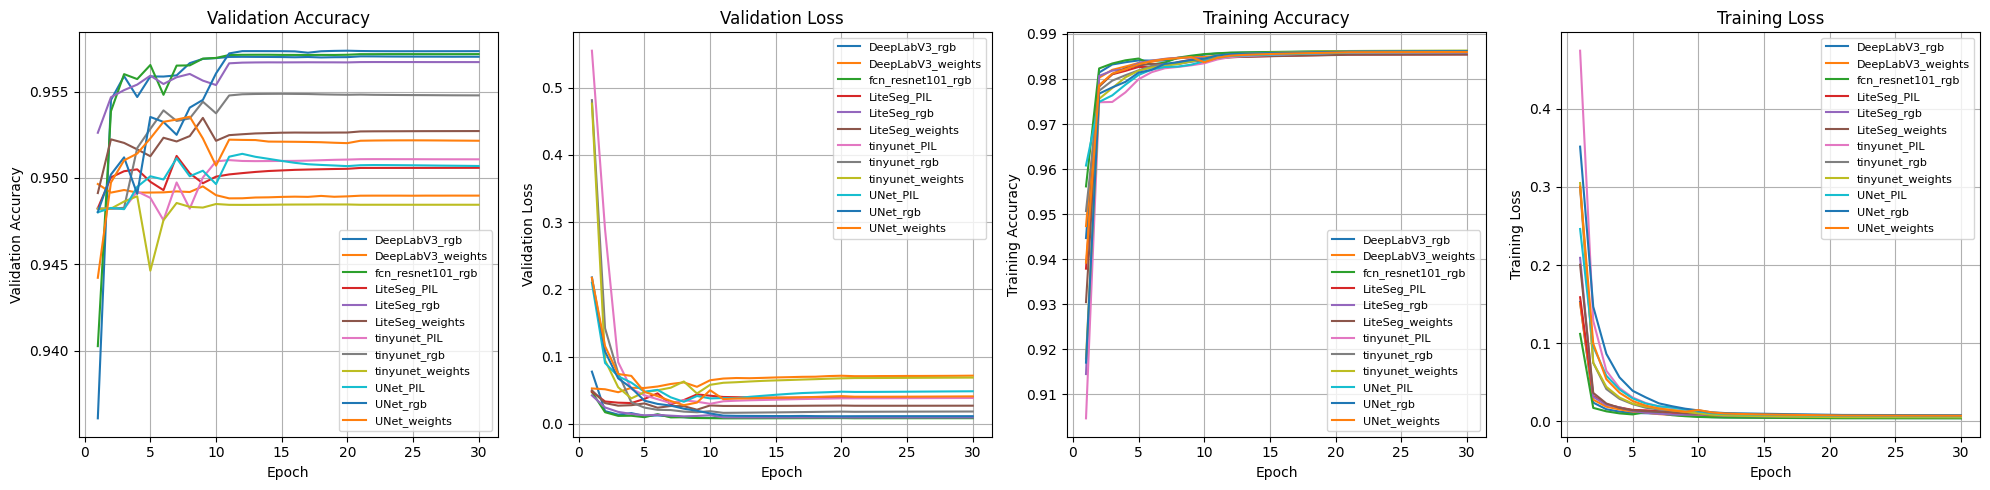

In [12]:
# Metrics to plot and their corresponding labels
metrics = ['valid_acc', 'valid_loss', 'train_acc', 'train_loss']
metric_labels = ['Validation Accuracy', 'Validation Loss', 'Training Accuracy', 'Training Loss']

# Call the function to plot subplots
plot_metrics(metrics, metric_labels, model_data)


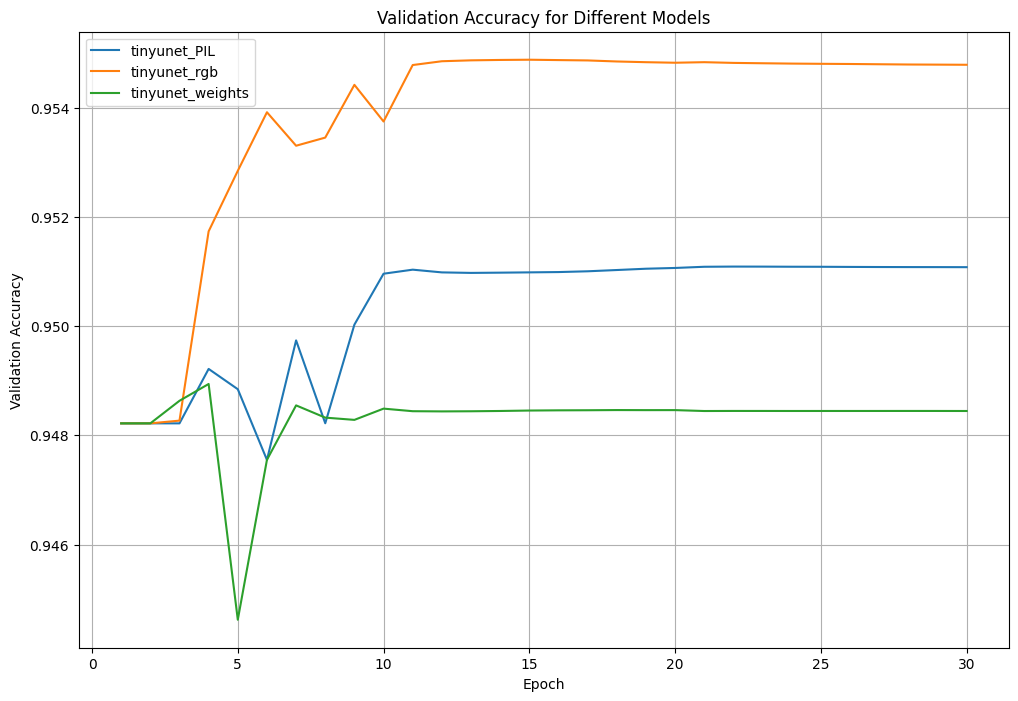

In [ ]:
# Path to the folder containing the CSV files
# folder_path = "ckpt/plots"
# folder_path = "ckpt/plots/LiteSeg"
# folder_path = "ckpt/plots/UNet"
folder_path = "ckpt/plots/Tinny Unet"
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Dictionary to store data for each model
model_data = {}

for file in csv_files:
    model_name = os.path.splitext(file)[0].split("training_results_")[-1]
    file_path = os.path.join(folder_path, file)
    model_data[model_name] = pd.read_csv(file_path)

def plot_metric(metric, ylabel, model_data):
    plt.figure(figsize=(12, 8))
    for model_name, data in model_data.items():
        plt.plot(data['epoch'][:30], data[metric][:30], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} for Different Models')
    plt.legend()
    plt.grid()
    plt.show()

# Plot training loss
# plot_metric('train_loss', 'Training Loss', model_data)

# # Plot training accuracy
# plot_metric('train_acc', 'Training Accuracy', model_data)

# # Plot validation loss
# plot_metric('valid_loss', 'Validation Loss', model_data)

# Plot validation accuracy
plot_metric('valid_acc', 'Validation Accuracy', model_data)


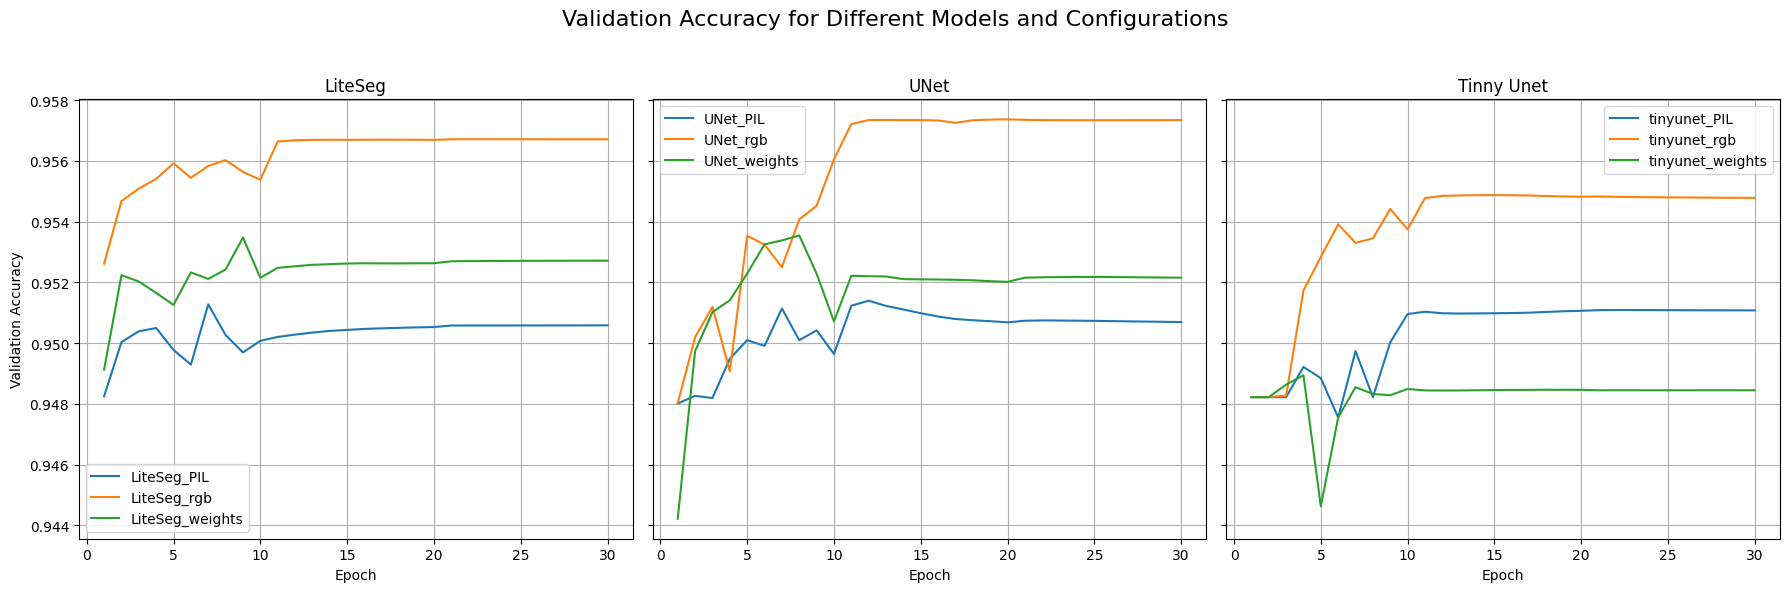

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base path to the folder containing the model folders
base_folder_path = "ckpt/plots"

# List of model folders
model_folders = ["LiteSeg", "UNet", "Tinny Unet"]

# Prepare a dictionary to hold data for each model and its configurations
all_model_data = {}

for folder in model_folders:
    folder_path = os.path.join(base_folder_path, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    model_data = {}
    for file in csv_files:
        config_name = os.path.splitext(file)[0].split("training_results_")[-1]
        file_path = os.path.join(folder_path, file)
        model_data[config_name] = pd.read_csv(file_path)
    
    all_model_data[folder] = model_data

# Plot the subplots
fig, axs = plt.subplots(1, len(model_folders), figsize=(18, 6), sharey=True)

for i, (model_name, model_data) in enumerate(all_model_data.items()):
    ax = axs[i]
    for config_name, data in model_data.items():
        ax.plot(data['epoch'][:30], data['valid_acc'][:30], label=config_name)
    ax.set_title(model_name)
    ax.set_xlabel('Epoch')
    if i == 0:
        ax.set_ylabel('Validation Accuracy')
    ax.legend()
    ax.grid()

plt.suptitle('Validation Accuracy for Different Models and Configurations', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


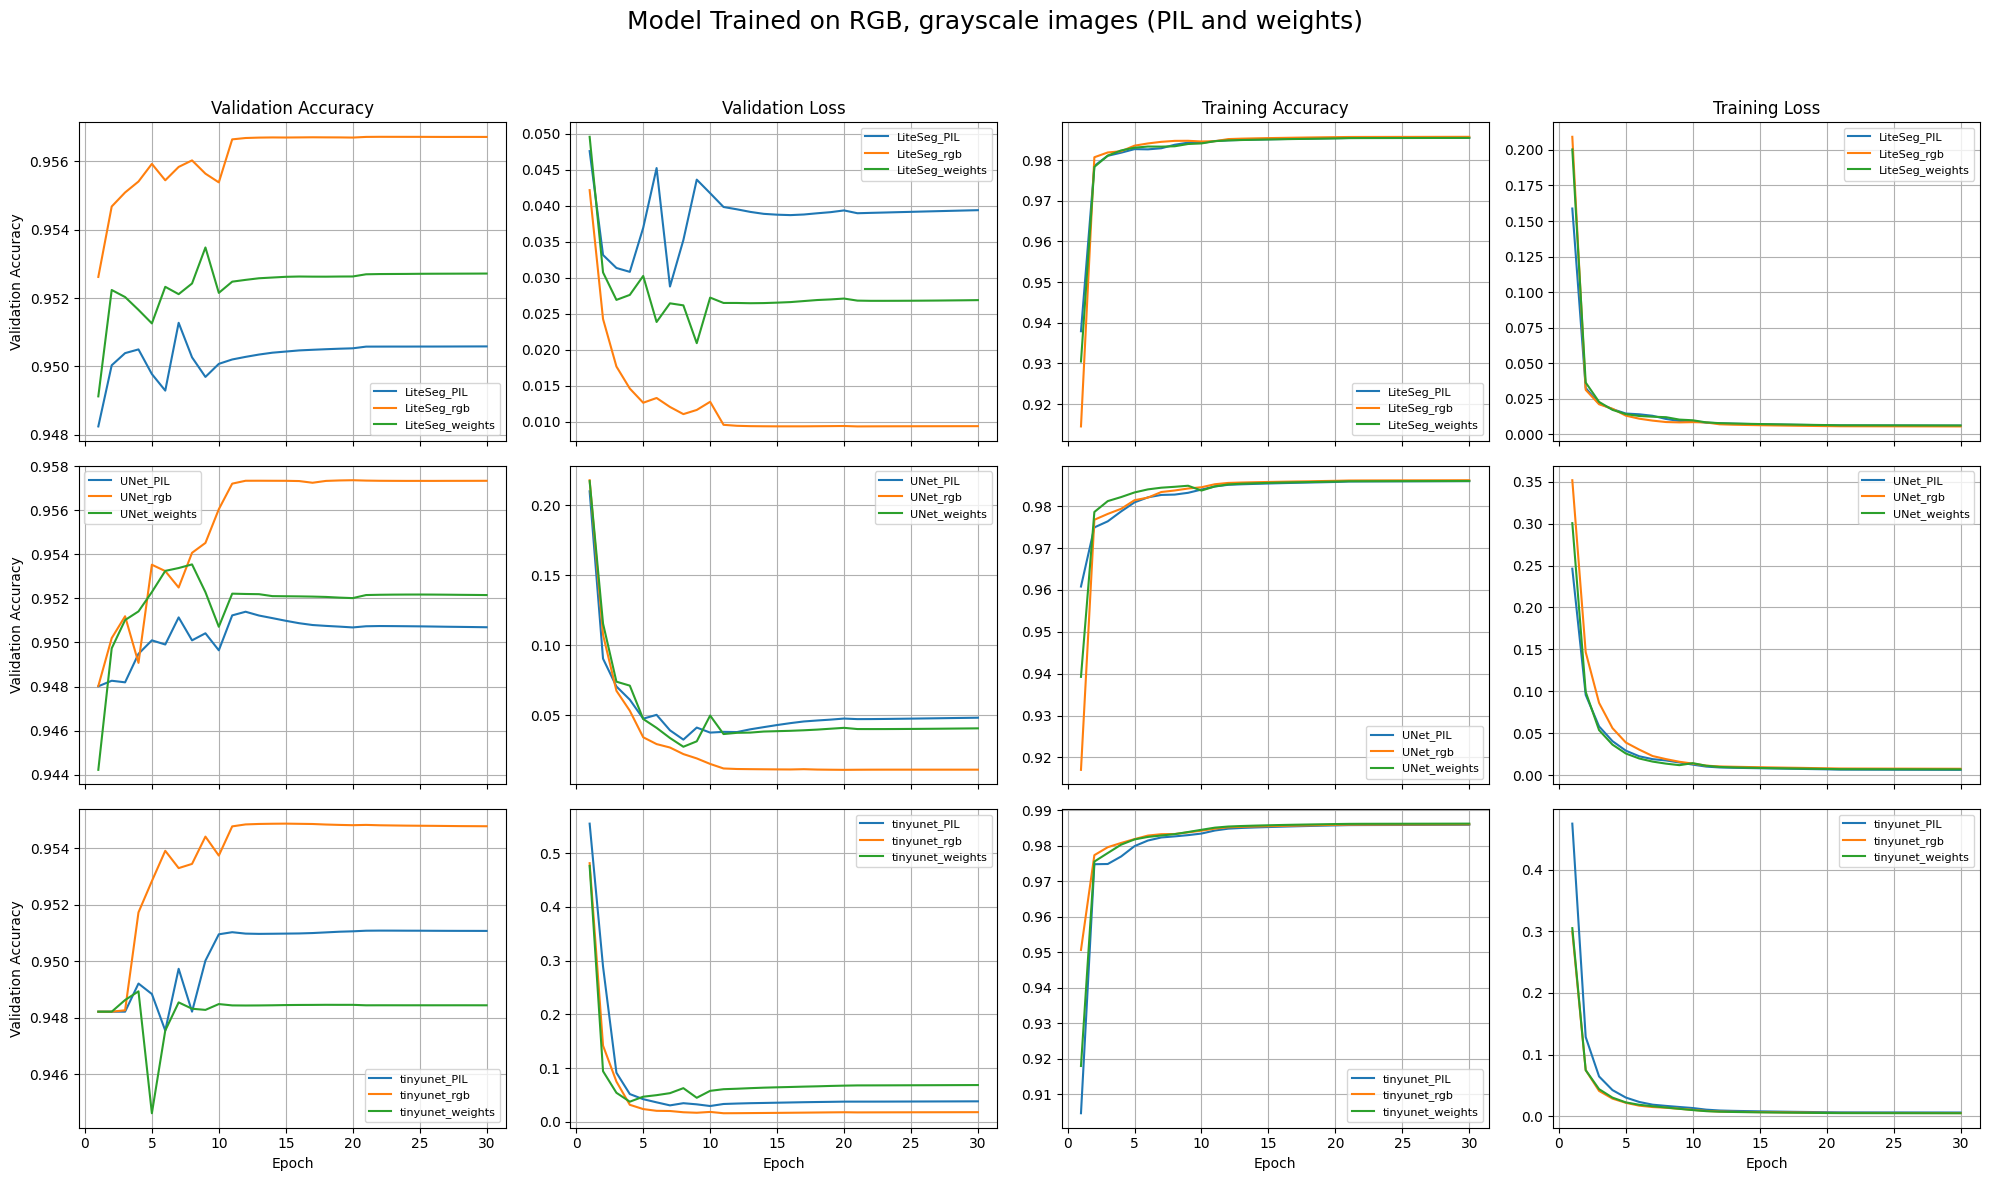

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Base path to the folder containing the model folders
base_folder_path = "ckpt/plots"

# List of model folders
model_folders = ["LiteSeg", "UNet", "Tinny Unet"]

# Prepare a dictionary to hold data for each model and its configurations
all_model_data = {}

for folder in model_folders:
    folder_path = os.path.join(base_folder_path, folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    
    model_data = {}
    for file in csv_files:
        config_name = os.path.splitext(file)[0].split("training_results_")[-1]
        file_path = os.path.join(folder_path, file)
        model_data[config_name] = pd.read_csv(file_path)
    
    all_model_data[folder] = model_data

# Plot the subplots
num_metrics = 4  # Number of metrics to plot (valid_acc, valid_loss, train_acc, train_loss)
metric_labels = [
    ('valid_acc', 'Validation Accuracy'),
    ('valid_loss', 'Validation Loss'),
    ('train_acc', 'Training Accuracy'),
    ('train_loss', 'Training Loss'),
]

fig, axs = plt.subplots(len(model_folders), num_metrics, figsize=(20, 12), sharex=True)

for i, (model_name, model_data) in enumerate(all_model_data.items()):
    for j, (metric, ylabel) in enumerate(metric_labels):
        ax = axs[i, j]
        for config_name, data in model_data.items():
            ax.plot(data['epoch'][:30], data[metric][:30], label=config_name)
        # ax.set_title(f'{model_name} - {ylabel}' if i == 0 else '')
        ax.set_title(f'{ylabel}' if i == 0 else '')

        ax.set_ylabel(ylabel if j == 0 else '')
        if i == len(model_folders) - 1:
            ax.set_xlabel('Epoch')
        ax.legend(loc='best', fontsize=8)
        ax.grid()

# Add a super title
plt.suptitle('Model Trained on RGB, grayscale images (PIL and weights)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
def plot_metric(metric, ylabel, model_data, save_dir="plots"):
    os.makedirs(save_dir, exist_ok=True)
    plt.figure(figsize=(10, 6))
    for model_name, data in model_data.items():
        plt.plot(data['epoch'], data[metric], label=model_name)
    plt.xlabel('Epoch')
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} for Different Models')
    plt.legend()
    plt.grid()
    save_path = os.path.join(save_dir, f"{metric}.png")
    plt.savefig(save_path)
    print(f"Saved plot to {save_path}")
    plt.close()


In [ ]:
plot_metric('train_loss', 'Training Loss', model_data)
plot_metric('train_acc', 'Training Accuracy', model_data)
plot_metric('valid_loss', 'Validation Loss', model_data)
plot_metric('valid_acc', 'Validation Accuracy', model_data)
